### Sweeps to analyze how budget constraints affect miss rate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from tqdm import tqdm
sns.set(style='white', font_scale=1.5)
import numpy as np
from pulp import *
import os, glob
import pdb
from tqdm import tqdm
import sys
sys.path.insert(0, "../decision_alg")
from DecisionAnalysis import AbxDecisionMaker, load_predictions, perform_sweep, plot_histogram
from integer_programming import get_clinician_prescribing_patterns


/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
abx_settings = {"Ceftriaxone" : 404,
    "Vancomycin_Zosyn" :  149,
    "Zosyn" : 102,
    "Vancomycin_Ceftriaxone" : 31,
    "Vancomycin_Cefepime" : 23,
    "Cefepime" : 14,
    "Vancomycin" : 13,
    "Vancomycin_Meropenem" : 9,
    "Meropenem" : 9,
    "Cefazolin" : 8,
    "Ciprofloxacin" : 8,
    "Ampicillin" : 0,
    }

df_predictions = load_predictions()
df_drugs = get_clinician_prescribing_patterns()
opt = AbxDecisionMaker(df_predictions, df_drugs, abx_settings)

Performing Vancomycin_Zosyn to Ampicillin sweep


100%|██████████| 149/149 [02:13<00:00,  1.12it/s]


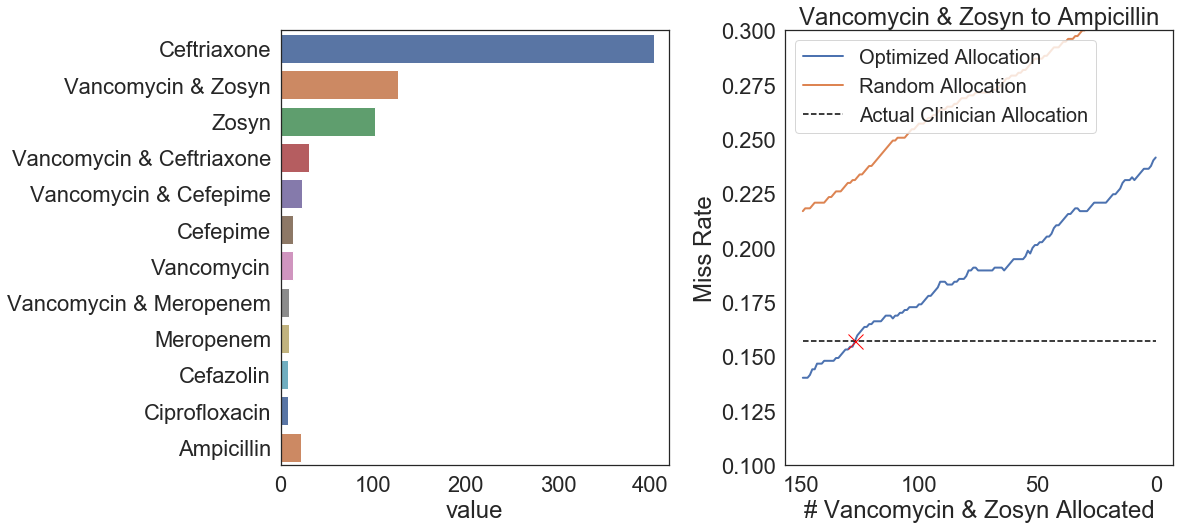

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
os.makedirs('./sweep_results', exist_ok=True)
fname='./sweep_results/test.txt'
settings = perform_sweep(opt, abx_1='Vancomycin_Zosyn', abx_2='Ampicillin', ax=ax[1], fname=fname, legend=True, append=False)
plot_histogram(settings, ax[0])
plt.subplots_adjust(wspace=0.3)
plt.show()

### Select Sweeps for main body of text
* Vancomycin & Zosyn to Zosyn
* Zosyn to Cefazolin
* Ceftriaxone to Cefazolin
* Ceftriaxone to Ampicillin

Performing Vancomycin_Zosyn to Zosyn sweep


100%|██████████| 149/149 [02:05<00:00,  1.18it/s]


Performing Zosyn to Cefazolin sweep


100%|██████████| 102/102 [01:17<00:00,  1.32it/s]


Performing Ceftriaxone to Cefazolin sweep


100%|██████████| 404/404 [05:01<00:00,  1.34it/s]


Performing Ceftriaxone to Ampicillin sweep


100%|██████████| 404/404 [04:46<00:00,  1.41it/s]


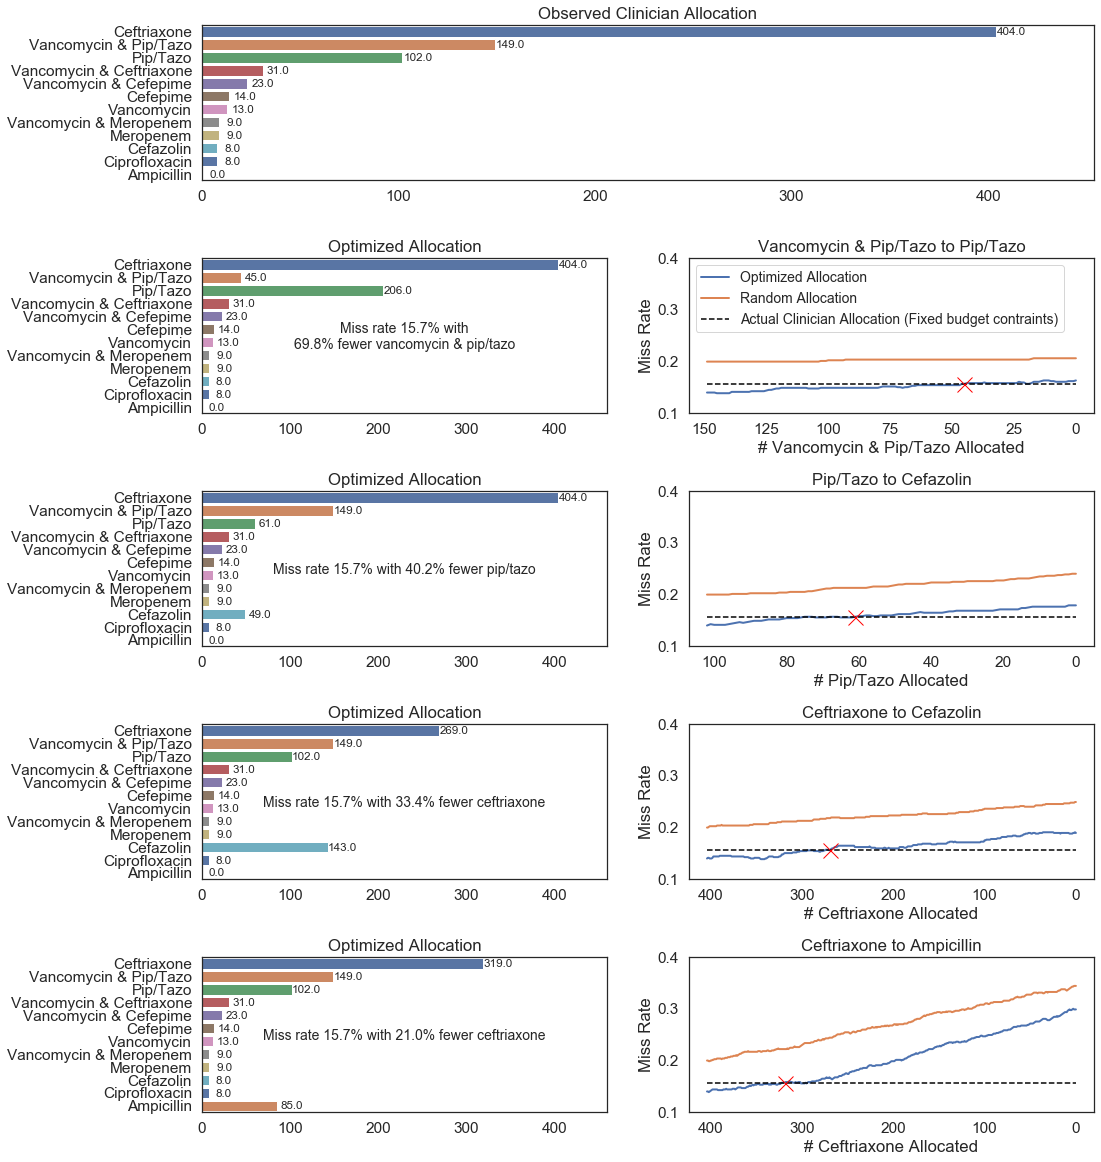

In [6]:
# fig, ax = plt.subplots(5, 2, figsize=(16, 50))
sns.set(style='white', font_scale=1.4)
os.makedirs('./sweep_results', exist_ok=True)
fname='./sweep_results/test.txt'

# Plot original settings
abx_settings = {"Ceftriaxone" : 404,
    "Vancomycin_Zosyn" :  149,
    "Zosyn" : 102,
    "Vancomycin_Ceftriaxone" : 31,
    "Vancomycin_Cefepime" : 23,
    "Cefepime" : 14,
    "Vancomycin" : 13,
    "Vancomycin_Meropenem" : 9,
    "Meropenem" : 9,
    "Cefazolin" : 8,
    "Ciprofloxacin" : 8,
    "Ampicillin" : 0,
    }

plt.figure(figsize=(16,20))
gs = gridspec.GridSpec(5, 2, hspace=0.5)
ax1a = plt.subplot(gs[0, :])

ax2a = plt.subplot(gs[1, 0])
ax2b = plt.subplot(gs[1, 1])

ax3a = plt.subplot(gs[2, 0])
ax3b = plt.subplot(gs[2, 1])

ax4a = plt.subplot(gs[3, 0])
ax4b = plt.subplot(gs[3, 1])

ax5a = plt.subplot(gs[4, 0])
ax5b = plt.subplot(gs[4, 1])

axes = [[ax1a], [ax2a, ax2b], [ax3a, ax3b], [ax4a, ax4b], [ax5a, ax5b]]

plot_histogram(abx_settings, axes[0][0])
axes[0][0].set_title("Observed Clinician Allocation")
axes[0][0].set_xlabel('')

# Vanc zosyn to zosyn
settings, miss_rate, reduction_rate = perform_sweep(opt,
                                      abx_1='Vancomycin_Zosyn',
                                      abx_2='Zosyn',
                                      ax=axes[1][1],
                                      fname='./sweep_results/Vancomycin_Zosyn_to_Zosyn.txt',
                                      legend=True,
                                      append=False)
plot_histogram(settings, axes[1][0], miss_rate, reduction_rate, 'vancomycin & pip/tazo')
axes[1][0].set_title("Optimized Allocation")


# Zosyn to Cefazolin
settings, miss_rate, reduction_rate = perform_sweep(opt,
                                    abx_1='Zosyn',
                                    abx_2='Cefazolin',
                                    ax=axes[2][1],
                                    fname='./sweep_results/Zosyn_to_Cefazolin.txt',
                                    legend=False,
                                    append=False)
plot_histogram(settings, axes[2][0], miss_rate, reduction_rate, 'pip/tazo')
axes[2][0].set_title("Optimized Allocation")


# Ceftriaxone to Cefazolin
settings, miss_rate, reduction_rate = perform_sweep(opt,
                                    abx_1='Ceftriaxone',
                                    abx_2='Cefazolin',
                                    ax=axes[3][1],
                                    fname='./sweep_results/Ceftriaxone_to_Cefazolin.txt',
                                    legend=False,
                                    append=False)
plot_histogram(settings, axes[3][0], miss_rate, reduction_rate, 'ceftriaxone')
axes[3][0].set_title("Optimized Allocation")


settings, miss_rate, reduction_rate = perform_sweep(opt,
                                    abx_1='Ceftriaxone',
                                    abx_2='Ampicillin',
                                    ax=axes[4][1],
                                    fname='./sweep_results/Ceftriaxone_to_Ampicillin.txt',
                                    legend=False,
                                    append=False)
plot_histogram(settings, axes[4][0], miss_rate, reduction_rate, 'ceftriaxone')
axes[4][0].set_title("Optimized Allocation")

plt.show()

## Perform de-escalation sweeps

Here we take every combo of broader to narrower spectrum antibiotic and perform a sweep where the allocation constraint for the broader drug is reduced in favor of the narrower drug.  Save all to a pdf. 

In [9]:
abx_rankings = ['Vancomycin_Meropenem',
                'Vancomycin_Cefepime',
                'Vancomycin_Zosyn',
                'Zosyn',
                'Vancomycin_Ceftriaxone',
                'Meropenem',
                'Cefepime',
                'Ceftriaxone',
                'Ciprofloxacin',
                'Cefazolin',
                'Ampicillin',
                'Vancomycin'
                ]


def get_narrower_sets(abx_rankings):
    """Get a list of tupes for sweeps"""
    combos = []
    for i, abx in enumerate(abx_rankings):
        combos += [(abx, abx_rankings[j]) for j in range(len(abx_rankings)) if j > i
                   and abx != 'Ampicillin']
    
    print("Number of sweep plots %s" % len(combos))
    return combos

def create_axes(num_sweeps, first=False):
    gs = gridspec.GridSpec(num_sweeps, 2, hspace=0.5)
    axes = []
    if first:
        axes.append([plt.subplot(gs[0, :])])
        for i in range(num_sweeps-1):
            axes.append([plt.subplot(gs[i+1, 0]), plt.subplot(gs[i+1, 1])])
    else:
        for i in range(num_sweeps):
            axes.append([plt.subplot(gs[i, 0]), plt.subplot(gs[i, 1])])
    return axes

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("Sweep_Plots_Broad_to_Narrow.pdf")
abx_combos = get_narrower_sets(abx_rankings)

Number of sweep plots 65


Performing Vancomycin_Meropenem to Vancomycin_Cefepime sweep


100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


Performing Vancomycin_Meropenem to Vancomycin_Zosyn sweep


100%|██████████| 9/9 [00:06<00:00,  1.30it/s]


Performing Vancomycin_Meropenem to Zosyn sweep


100%|██████████| 9/9 [00:06<00:00,  1.31it/s]


Performing Vancomycin_Meropenem to Vancomycin_Ceftriaxone sweep


100%|██████████| 9/9 [00:07<00:00,  1.20it/s]


Performing Vancomycin_Meropenem to Meropenem sweep


100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


Performing Vancomycin_Meropenem to Cefepime sweep


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


Performing Vancomycin_Meropenem to Ceftriaxone sweep


100%|██████████| 9/9 [00:06<00:00,  1.30it/s]


Performing Vancomycin_Meropenem to Ciprofloxacin sweep


100%|██████████| 9/9 [00:06<00:00,  1.29it/s]


Performing Vancomycin_Meropenem to Cefazolin sweep


100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


Performing Vancomycin_Meropenem to Ampicillin sweep


100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


Performing Vancomycin_Meropenem to Vancomycin sweep


100%|██████████| 9/9 [00:06<00:00,  1.31it/s]


Performing Vancomycin_Cefepime to Vancomycin_Zosyn sweep


100%|██████████| 23/23 [00:17<00:00,  1.31it/s]


Performing Vancomycin_Cefepime to Zosyn sweep


100%|██████████| 23/23 [00:17<00:00,  1.29it/s]


Performing Vancomycin_Cefepime to Vancomycin_Ceftriaxone sweep


100%|██████████| 23/23 [00:17<00:00,  1.31it/s]


Performing Vancomycin_Cefepime to Meropenem sweep


100%|██████████| 23/23 [00:17<00:00,  1.33it/s]


Performing Vancomycin_Cefepime to Cefepime sweep


100%|██████████| 23/23 [00:17<00:00,  1.33it/s]


Performing Vancomycin_Cefepime to Ceftriaxone sweep


100%|██████████| 23/23 [00:17<00:00,  1.32it/s]


Performing Vancomycin_Cefepime to Ciprofloxacin sweep


100%|██████████| 23/23 [00:17<00:00,  1.33it/s]


Performing Vancomycin_Cefepime to Cefazolin sweep


100%|██████████| 23/23 [00:17<00:00,  1.28it/s]


Performing Vancomycin_Cefepime to Ampicillin sweep


100%|██████████| 23/23 [00:16<00:00,  1.40it/s]


Performing Vancomycin_Cefepime to Vancomycin sweep


100%|██████████| 23/23 [00:17<00:00,  1.34it/s]


Performing Vancomycin_Zosyn to Zosyn sweep


100%|██████████| 149/149 [01:52<00:00,  1.33it/s]


Performing Vancomycin_Zosyn to Vancomycin_Ceftriaxone sweep


100%|██████████| 149/149 [01:53<00:00,  1.31it/s]


Performing Vancomycin_Zosyn to Meropenem sweep


100%|██████████| 149/149 [01:55<00:00,  1.29it/s]


Performing Vancomycin_Zosyn to Cefepime sweep


100%|██████████| 149/149 [01:53<00:00,  1.31it/s]


Performing Vancomycin_Zosyn to Ceftriaxone sweep


100%|██████████| 149/149 [01:53<00:00,  1.31it/s]


Performing Vancomycin_Zosyn to Ciprofloxacin sweep


100%|██████████| 149/149 [02:06<00:00,  1.18it/s]


Performing Vancomycin_Zosyn to Cefazolin sweep


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Performing Vancomycin_Zosyn to Ampicillin sweep


100%|██████████| 149/149 [01:43<00:00,  1.44it/s]


Performing Vancomycin_Zosyn to Vancomycin sweep


100%|██████████| 149/149 [01:51<00:00,  1.33it/s]


Performing Zosyn to Vancomycin_Ceftriaxone sweep


100%|██████████| 102/102 [01:16<00:00,  1.34it/s]


Performing Zosyn to Meropenem sweep


100%|██████████| 102/102 [01:15<00:00,  1.35it/s]


Performing Zosyn to Cefepime sweep


100%|██████████| 102/102 [01:17<00:00,  1.31it/s]


Performing Zosyn to Ceftriaxone sweep


100%|██████████| 102/102 [01:14<00:00,  1.36it/s]


Performing Zosyn to Ciprofloxacin sweep


100%|██████████| 102/102 [01:15<00:00,  1.35it/s]


Performing Zosyn to Cefazolin sweep


100%|██████████| 102/102 [01:15<00:00,  1.35it/s]


Performing Zosyn to Ampicillin sweep


100%|██████████| 102/102 [01:09<00:00,  1.46it/s]


Performing Zosyn to Vancomycin sweep


100%|██████████| 102/102 [01:22<00:00,  1.23it/s]


Performing Vancomycin_Ceftriaxone to Meropenem sweep


100%|██████████| 31/31 [00:22<00:00,  1.35it/s]


Performing Vancomycin_Ceftriaxone to Cefepime sweep


100%|██████████| 31/31 [00:22<00:00,  1.38it/s]


Performing Vancomycin_Ceftriaxone to Ceftriaxone sweep


100%|██████████| 31/31 [00:22<00:00,  1.35it/s]


Performing Vancomycin_Ceftriaxone to Ciprofloxacin sweep


100%|██████████| 31/31 [00:22<00:00,  1.38it/s]


Performing Vancomycin_Ceftriaxone to Cefazolin sweep


100%|██████████| 31/31 [00:22<00:00,  1.35it/s]


Performing Vancomycin_Ceftriaxone to Ampicillin sweep


100%|██████████| 31/31 [00:21<00:00,  1.43it/s]


Performing Vancomycin_Ceftriaxone to Vancomycin sweep


100%|██████████| 31/31 [00:22<00:00,  1.37it/s]


Performing Meropenem to Cefepime sweep


100%|██████████| 9/9 [00:06<00:00,  1.39it/s]


Performing Meropenem to Ceftriaxone sweep


100%|██████████| 9/9 [00:06<00:00,  1.37it/s]


Performing Meropenem to Ciprofloxacin sweep


100%|██████████| 9/9 [00:06<00:00,  1.37it/s]


Performing Meropenem to Cefazolin sweep


100%|██████████| 9/9 [00:06<00:00,  1.34it/s]
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Performing Meropenem to Ampicillin sweep


100%|██████████| 9/9 [00:06<00:00,  1.44it/s]


Performing Meropenem to Vancomycin sweep


100%|██████████| 9/9 [00:06<00:00,  1.37it/s]


Performing Cefepime to Ceftriaxone sweep


100%|██████████| 14/14 [00:10<00:00,  1.35it/s]


Performing Cefepime to Ciprofloxacin sweep


100%|██████████| 14/14 [00:10<00:00,  1.35it/s]


Performing Cefepime to Cefazolin sweep


100%|██████████| 14/14 [00:10<00:00,  1.39it/s]
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Performing Cefepime to Ampicillin sweep


100%|██████████| 14/14 [00:09<00:00,  1.43it/s]


Performing Cefepime to Vancomycin sweep


100%|██████████| 14/14 [00:10<00:00,  1.37it/s]


Performing Ceftriaxone to Ciprofloxacin sweep


100%|██████████| 404/404 [04:56<00:00,  1.36it/s]


Performing Ceftriaxone to Cefazolin sweep


100%|██████████| 404/404 [04:57<00:00,  1.36it/s]


Performing Ceftriaxone to Ampicillin sweep


100%|██████████| 404/404 [04:47<00:00,  1.41it/s]
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Performing Ceftriaxone to Vancomycin sweep


100%|██████████| 404/404 [04:55<00:00,  1.37it/s]


Performing Ciprofloxacin to Cefazolin sweep


100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


Performing Ciprofloxacin to Ampicillin sweep


100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


Performing Ciprofloxacin to Vancomycin sweep


100%|██████████| 8/8 [00:07<00:00,  1.08it/s]


Performing Cefazolin to Ampicillin sweep


100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


<Figure size 1152x1440 with 0 Axes>

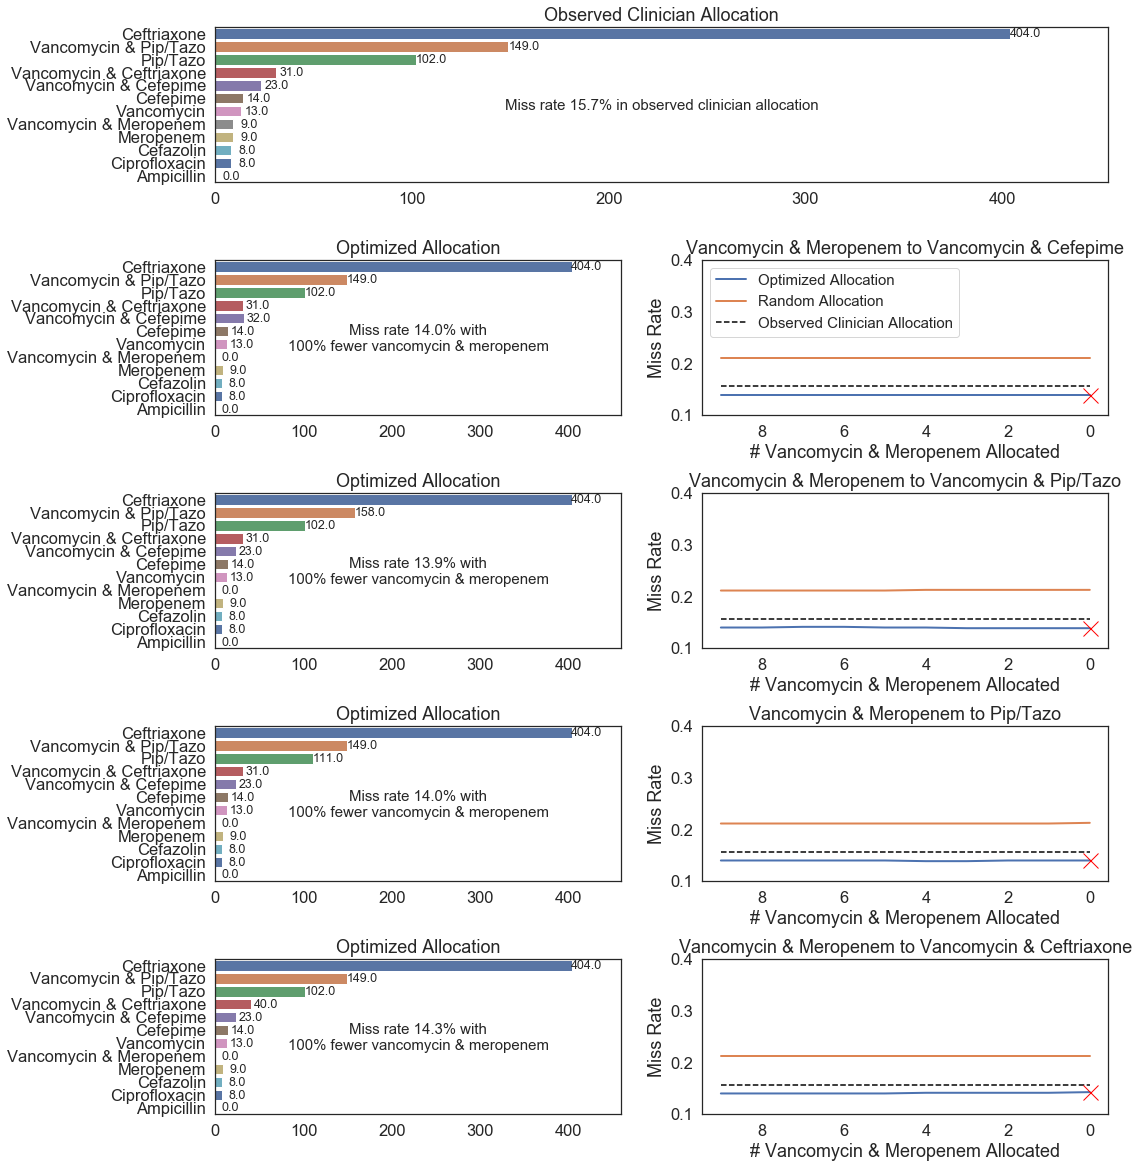

<Figure size 1152x1440 with 0 Axes>

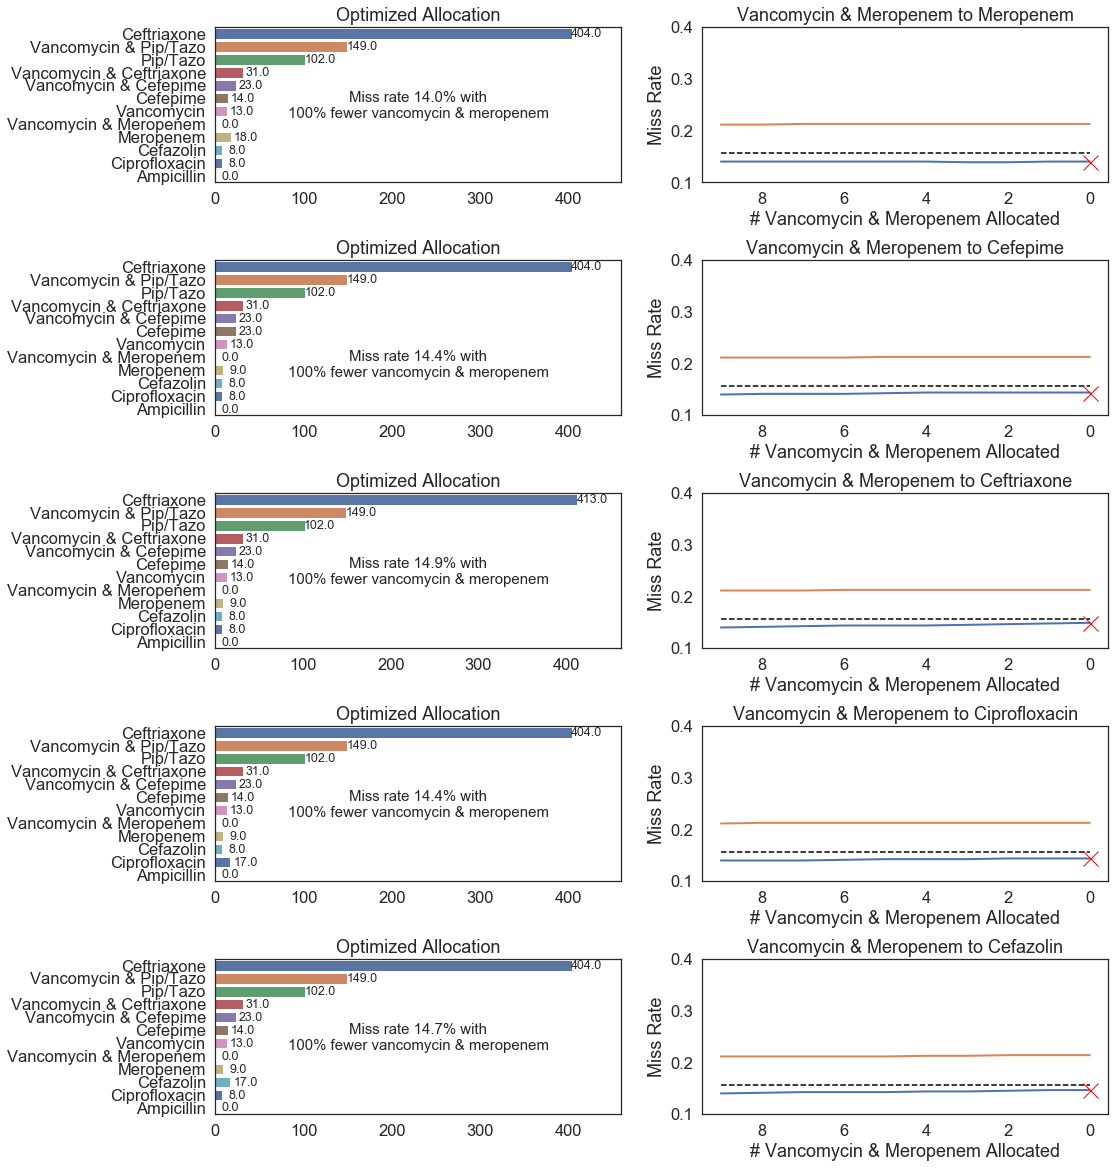

<Figure size 1152x1440 with 0 Axes>

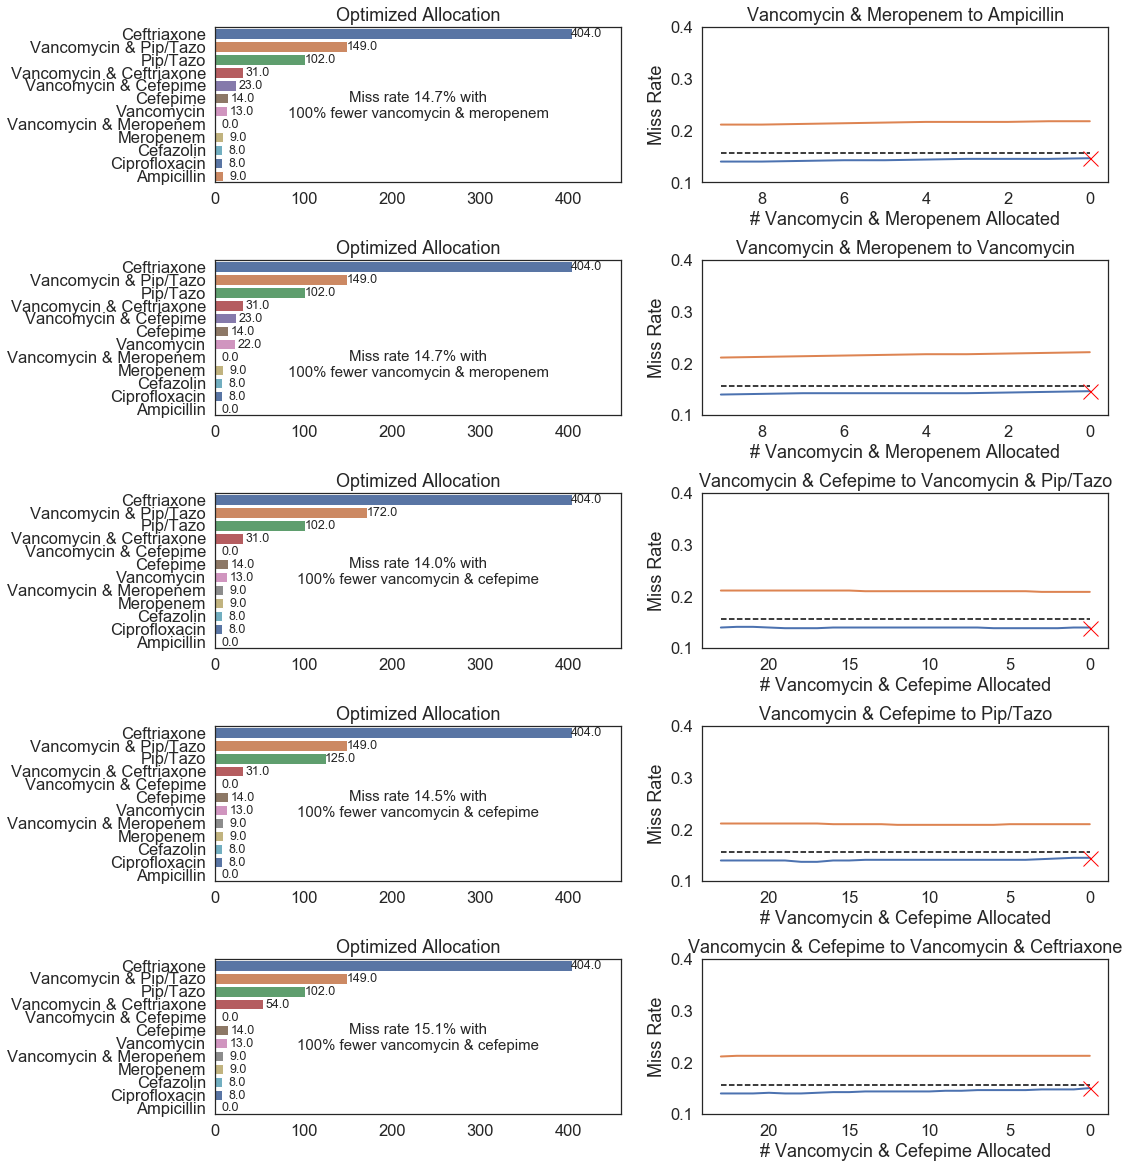

<Figure size 1152x1440 with 0 Axes>

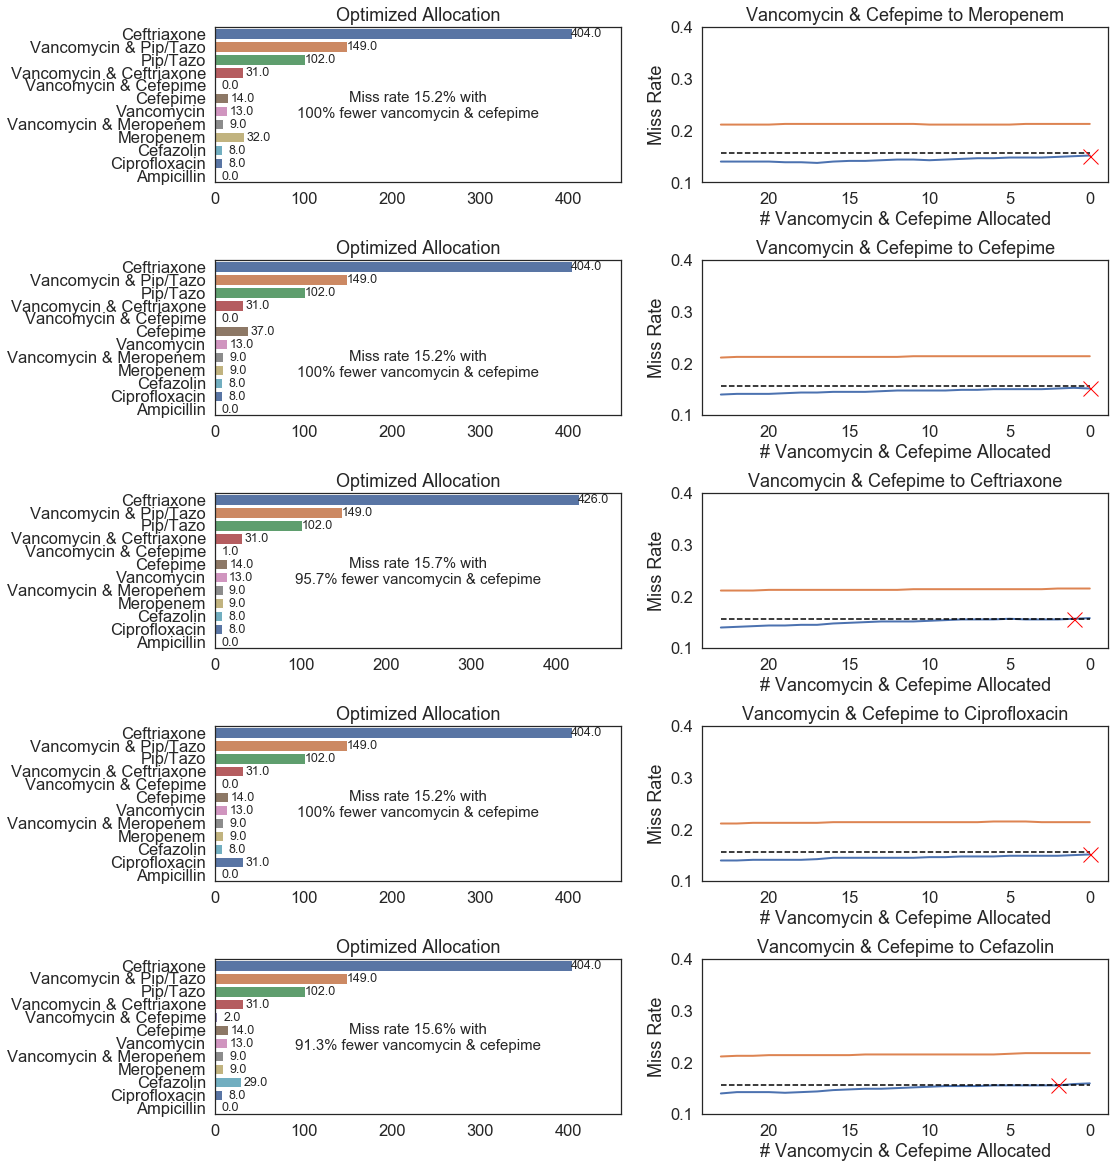

<Figure size 1152x1440 with 0 Axes>

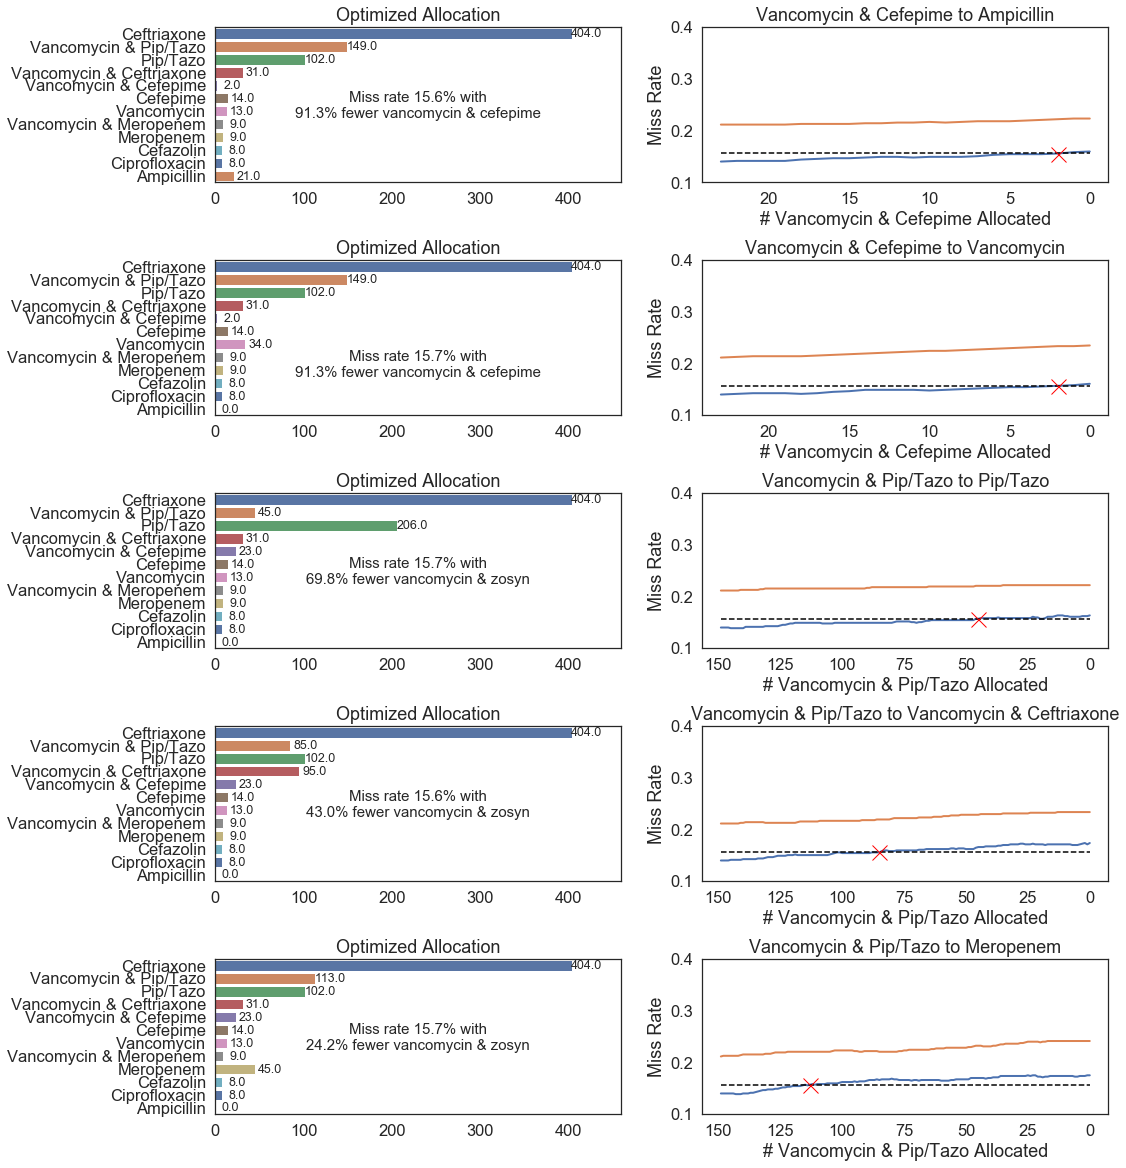

<Figure size 1152x1440 with 0 Axes>

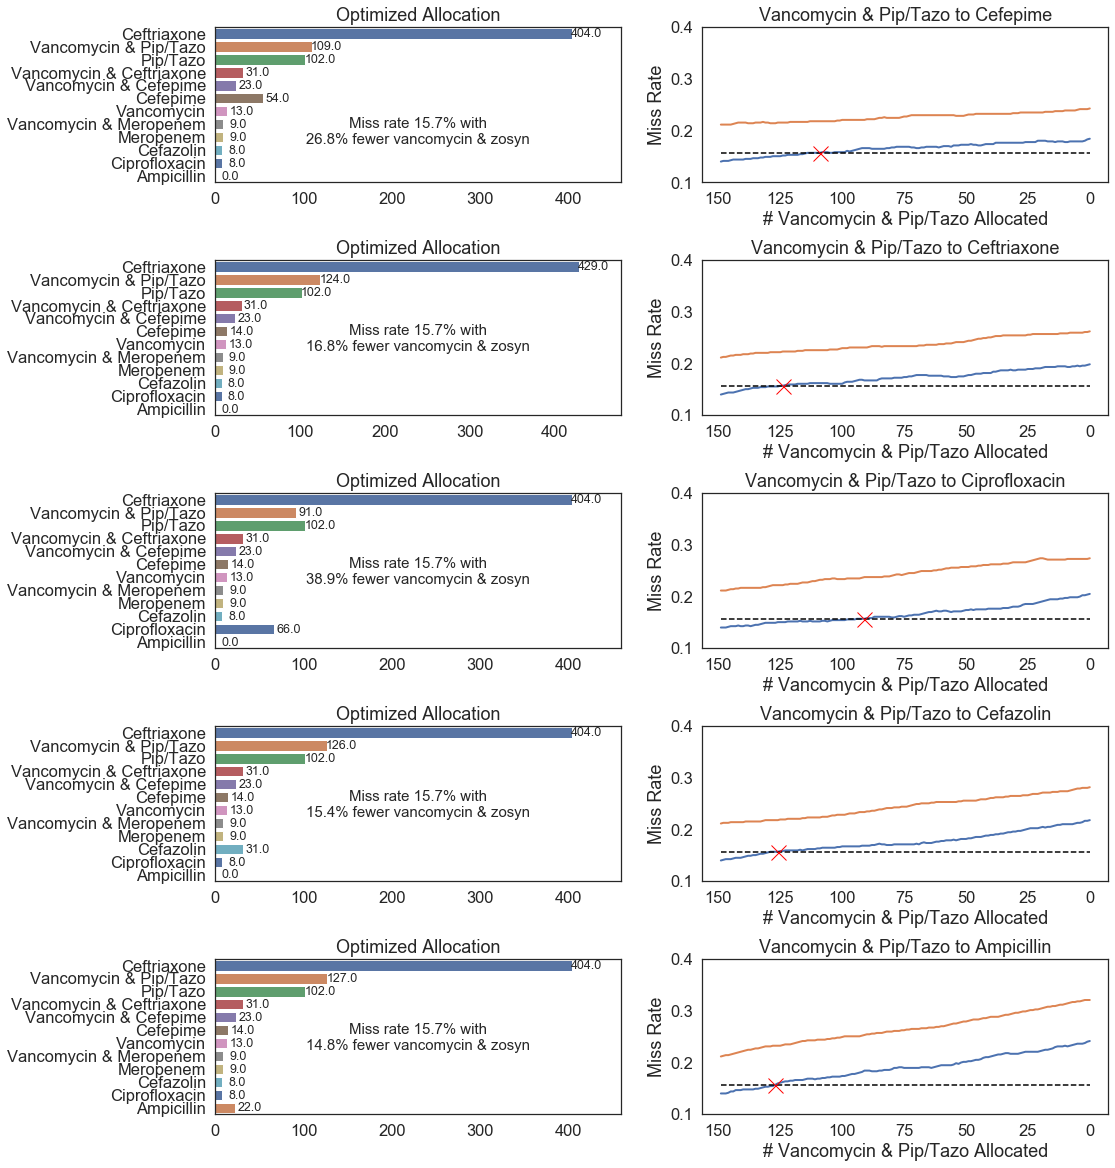

<Figure size 1152x1440 with 0 Axes>

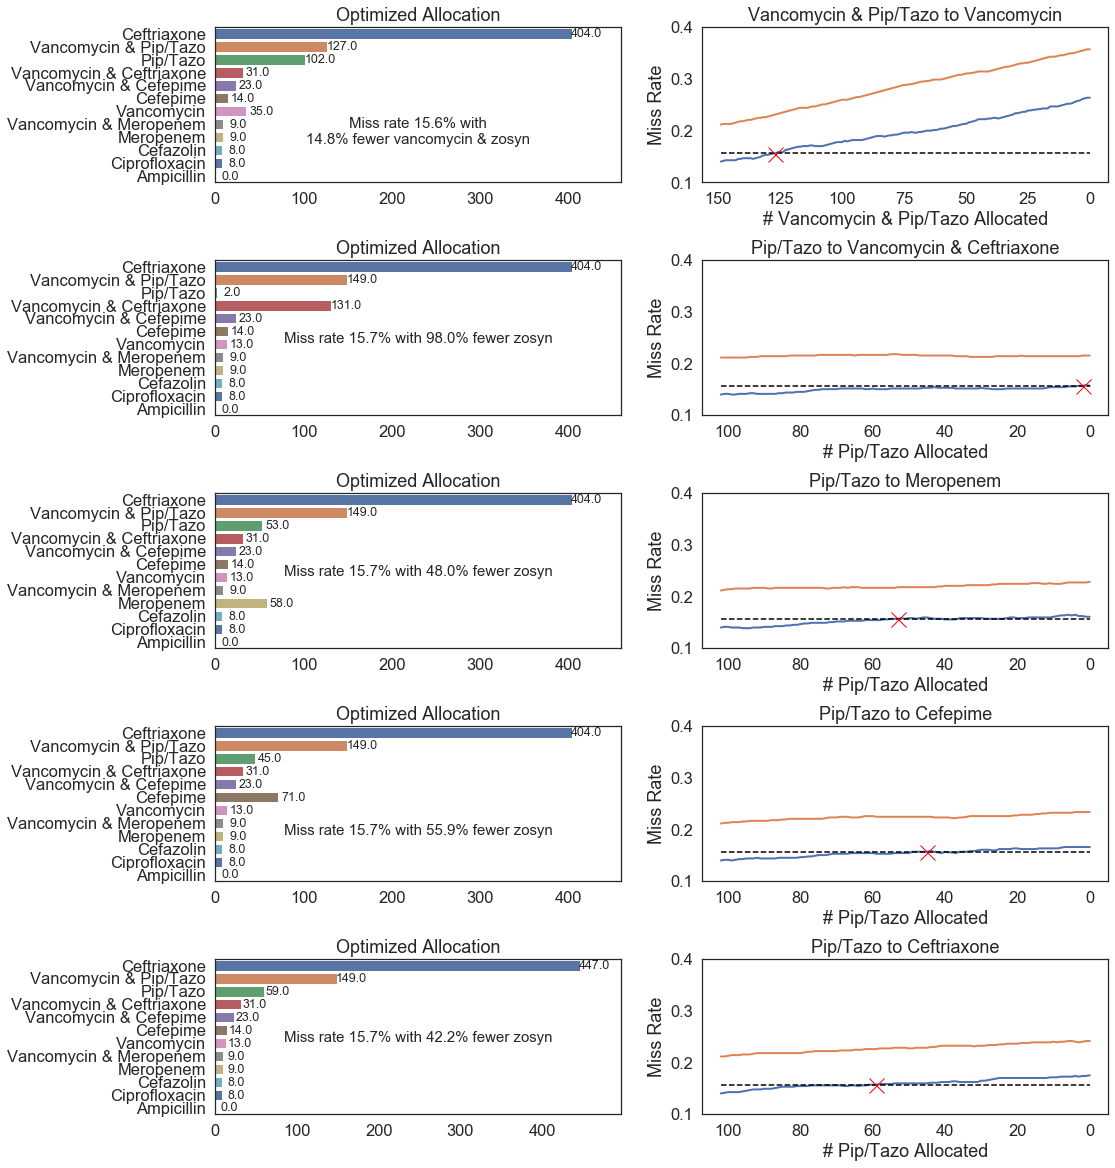

<Figure size 1152x1440 with 0 Axes>

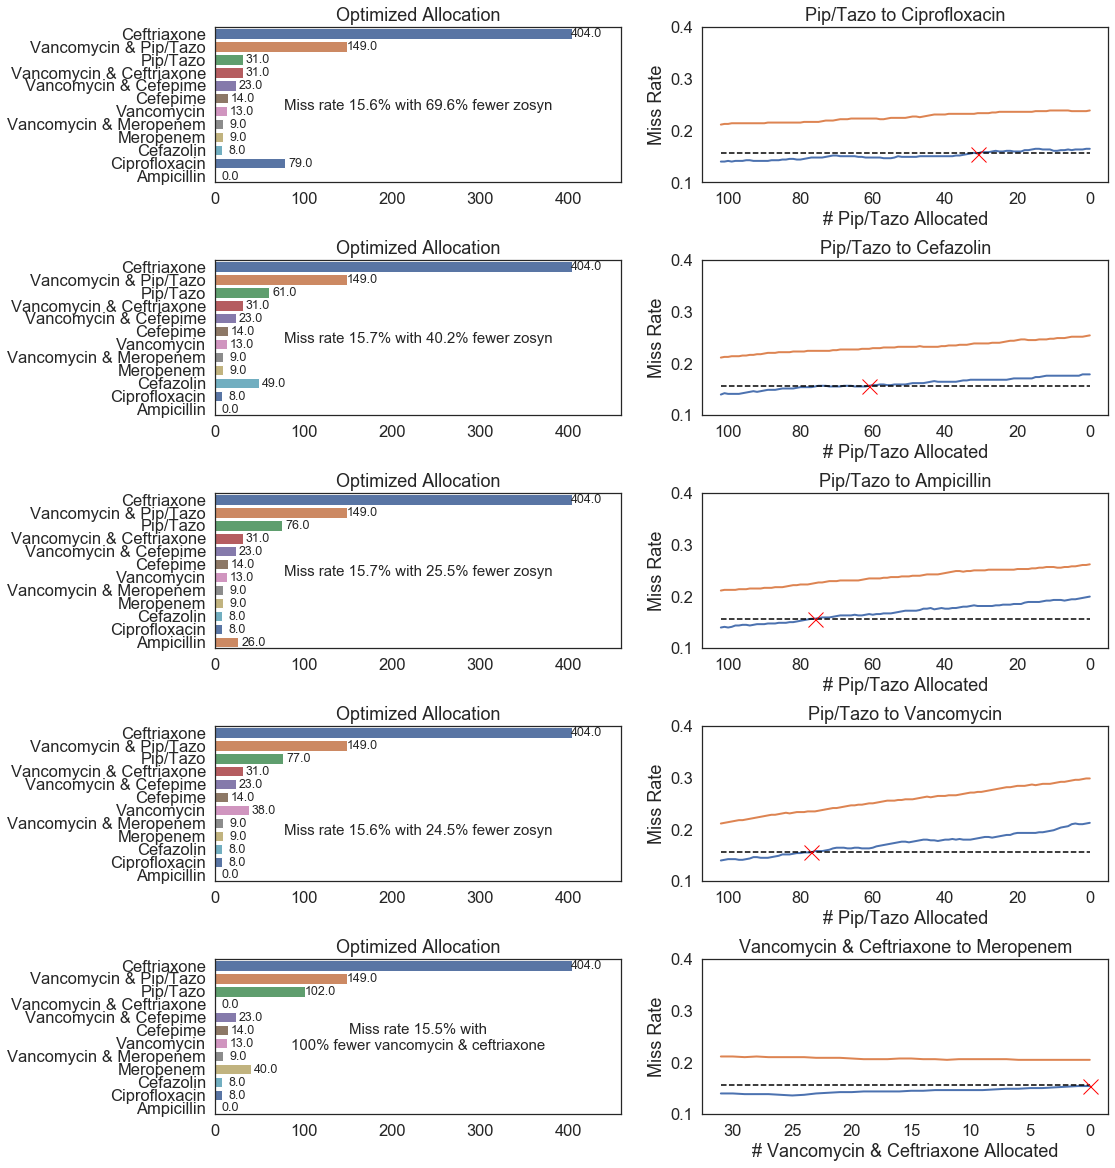

<Figure size 1152x1440 with 0 Axes>

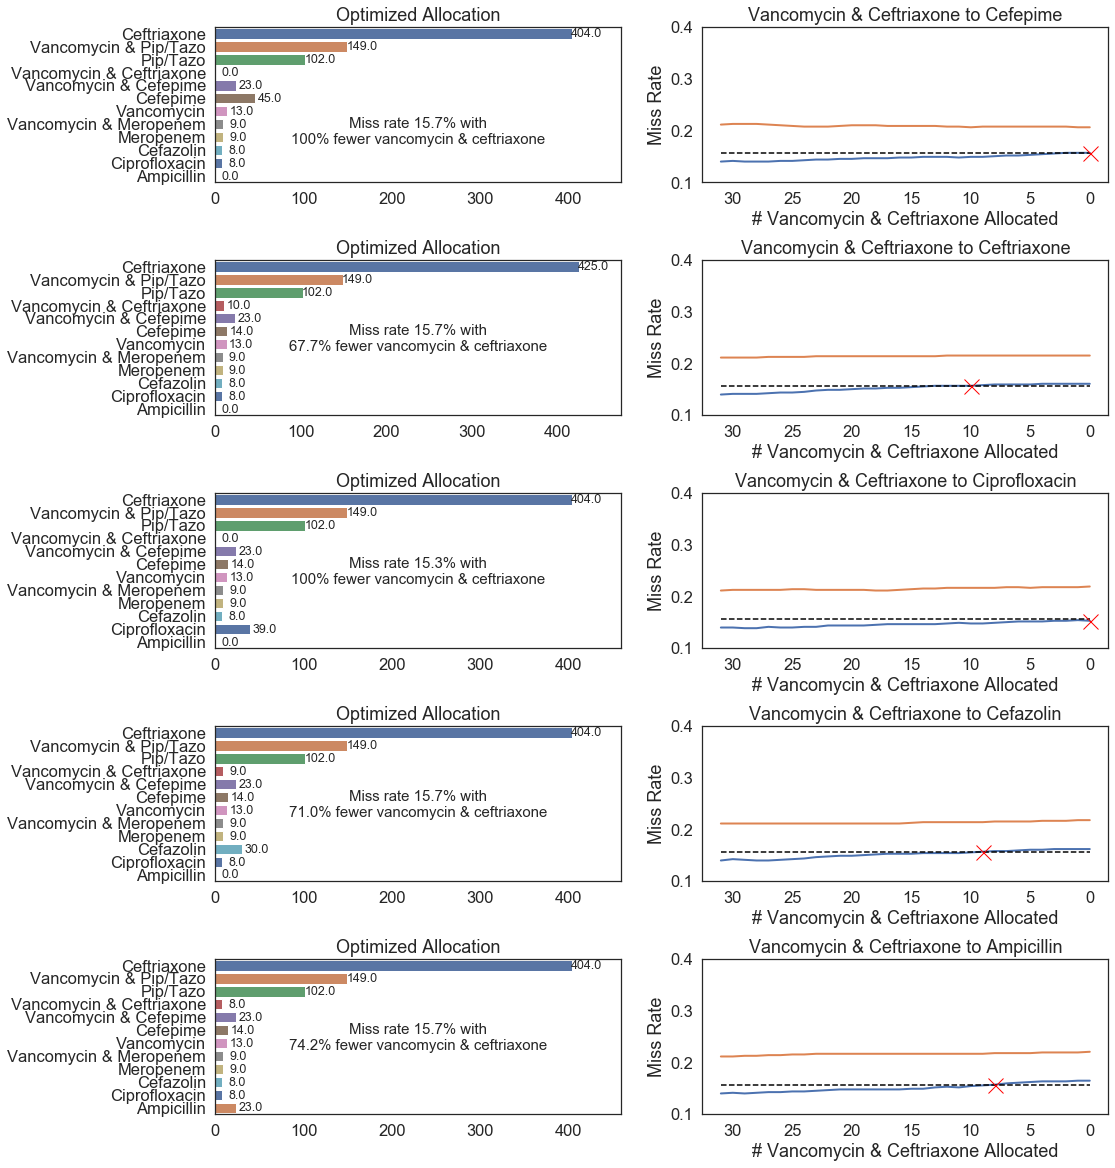

<Figure size 1152x1440 with 0 Axes>

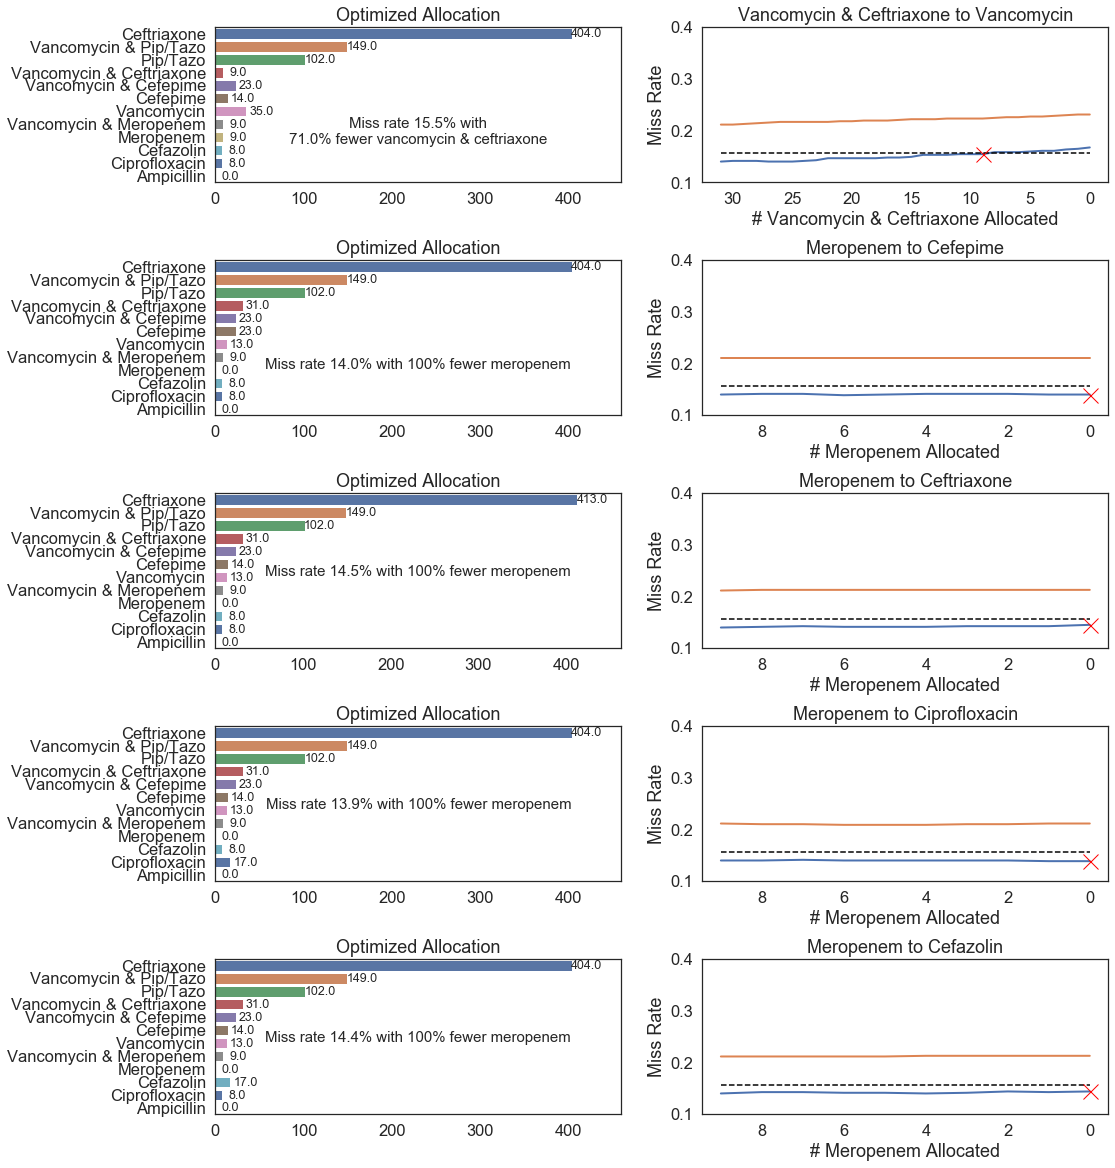

<Figure size 1152x1440 with 0 Axes>

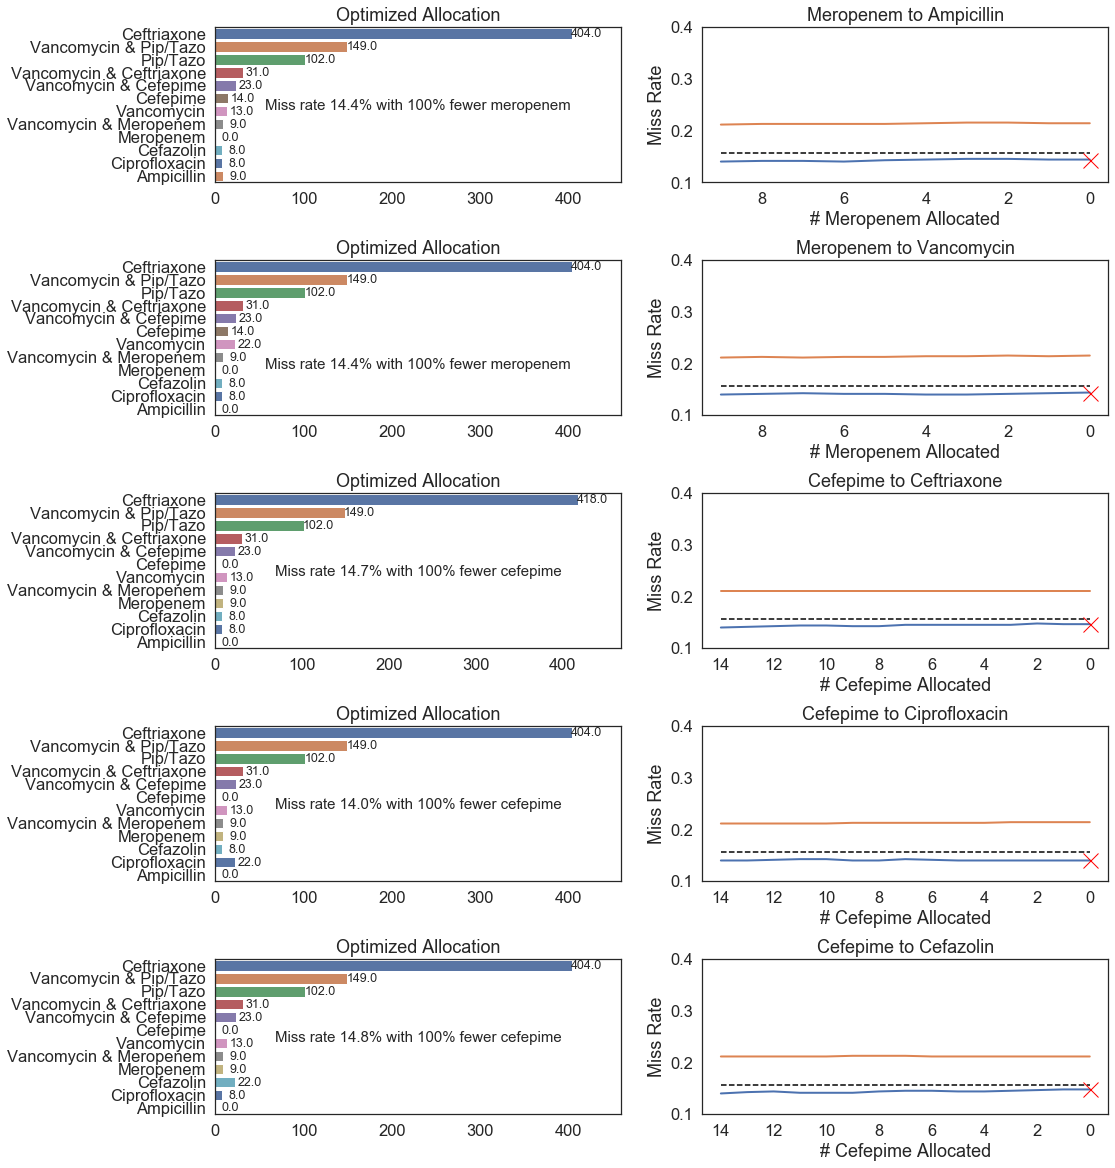

<Figure size 1152x1440 with 0 Axes>

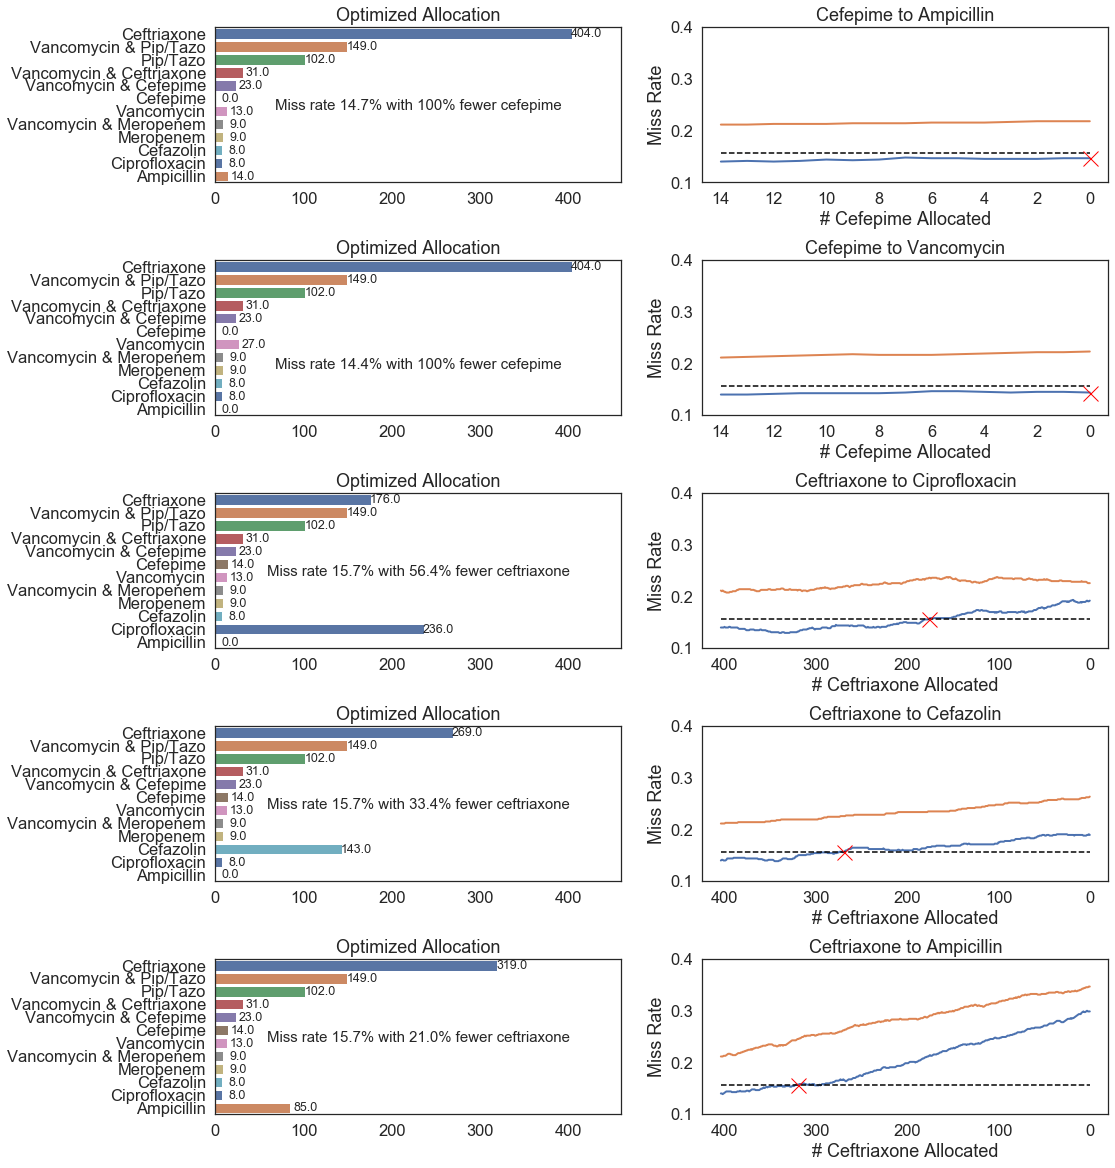

<Figure size 1152x1440 with 0 Axes>

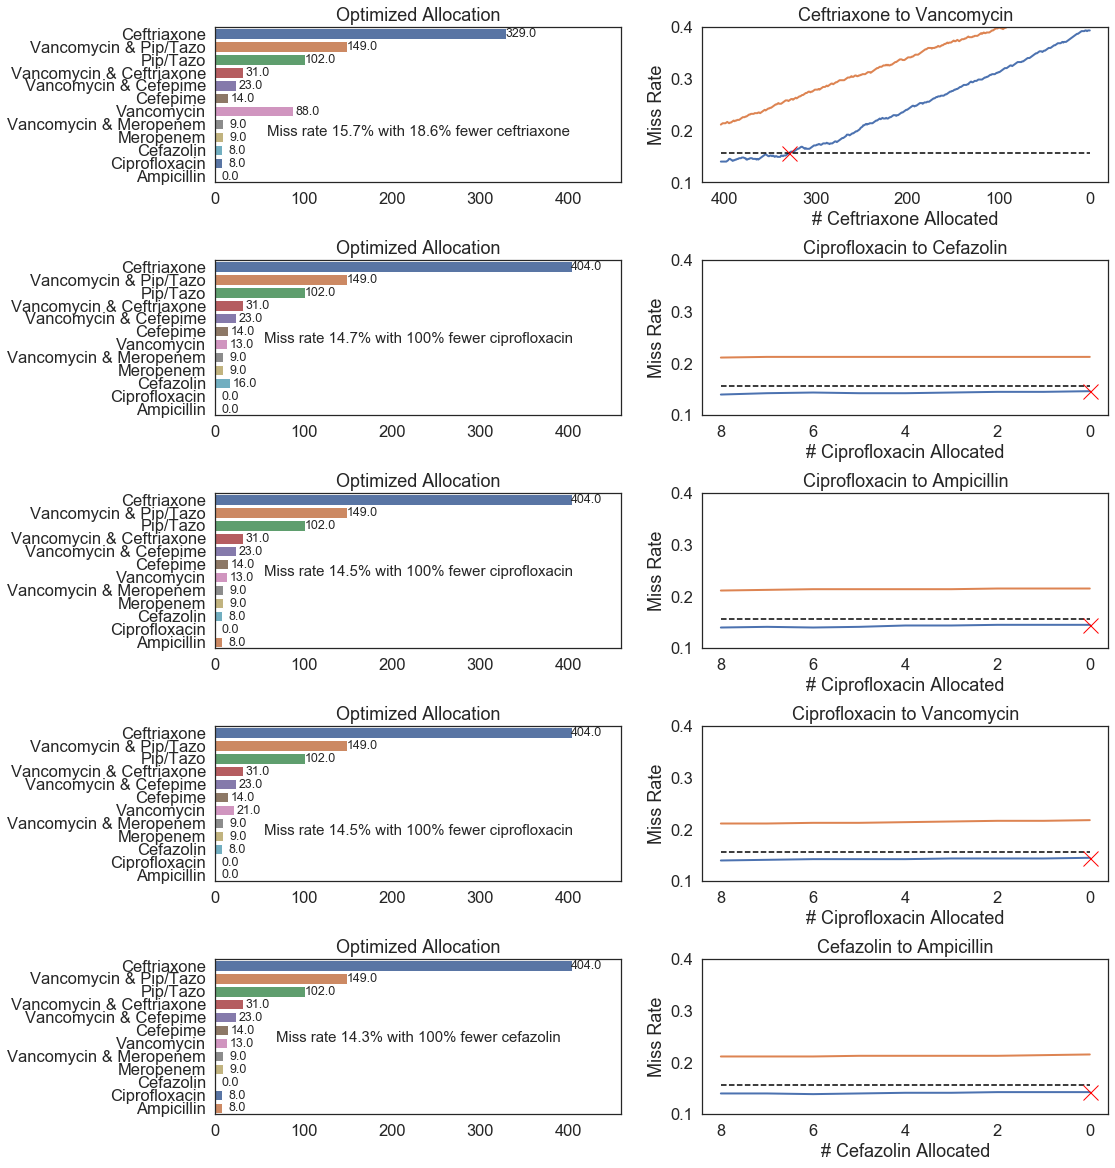

In [11]:
### Lets do 5 rows per page. 
combo_index = 0
while combo_index < len(abx_combos)-1:
    fig = plt.figure(figsize=(16, 20))
    if combo_index == 0:
        num_sweeps = min(5, len(abx_combos) + 1)
    else:
        num_sweeps = min(5, len(abx_combos) - combo_index)
    plt.figure(figsize=(16, num_sweeps*4))
    
    if combo_index == 0:
        axes = create_axes(num_sweeps, first=True)
    else:
        axes = create_axes(num_sweeps)
    
    for ax in axes:
        if len(ax) == 1:
            plot_histogram(abx_settings, ax[0])
            ax[0].set_title("Observed Clinician Allocation")
            ax[0].set_xlabel('')
        else:
            
            # Perform sweep
            if combo_index == 0:
                legend = True
            else:
                legend = False
            fname = './sweep_results/%s_to_%s.txt' % (abx_combos[combo_index][0], abx_combos[combo_index][1])
            settings, miss_rate, reduction_rate = perform_sweep(opt,
                                                  abx_1=abx_combos[combo_index][0],
                                                  abx_2=abx_combos[combo_index][1],
                                                  ax=ax[1],
                                                  fname=fname,
                                                  legend=legend,
                                                  append=False)
            
            sweep_name = abx_combos[combo_index][0].lower().replace('_', ' & ')
            plot_histogram(settings, ax[0], miss_rate, reduction_rate, sweep_name, abx2=abx_combos[combo_index][1])
            ax[0].set_title("Optimized Allocation")
            
            combo_index += 1
    
    
    pp.savefig(bbox_inches='tight')

pp.close()
